# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [238]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [239]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | kutum
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ardakan
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | pemangkat
Processing Record 14 of Set 1 | jardim de piranhas
Processing Record 15 of Set 1 | izumo
Processing Record 16 of Set 1 | goderich
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | turukhansk
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | kapaa
Processing Record 2

In [363]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [364]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poum,-20.2333,164.0167,298.67,77,68,9.19,NC,1682334078
1,bengkulu,-3.8004,102.2655,300.31,86,100,1.93,ID,1682333924
2,kutum,14.2000,24.6667,307.88,17,6,5.25,SD,1682333580
3,qaanaaq,77.4840,-69.3632,263.16,77,97,2.98,GL,1682334079
4,bredasdorp,-34.5322,20.0403,296.93,52,86,7.70,ZA,1682334079


In [365]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [366]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,298.67,77,68,9.19,NC,1682334078
1,bengkulu,-3.8004,102.2655,300.31,86,100,1.93,ID,1682333924
2,kutum,14.2000,24.6667,307.88,17,6,5.25,SD,1682333580
3,qaanaaq,77.4840,-69.3632,263.16,77,97,2.98,GL,1682334079
4,bredasdorp,-34.5322,20.0403,296.93,52,86,7.70,ZA,1682334079


In [367]:
# Convert Temp to Celsius
city_data_df['Max Temp'] = ((city_data_df['Max Temp'] - 32) * 5/9)


In [368]:

city_data_df['Max Temp'] = city_data_df['Max Temp'].round()
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,148.0,77,68,9.19,NC,1682334078
1,bengkulu,-3.8004,102.2655,149.0,86,100,1.93,ID,1682333924
2,kutum,14.2000,24.6667,153.0,17,6,5.25,SD,1682333580
3,qaanaaq,77.4840,-69.3632,128.0,77,97,2.98,GL,1682334079
4,bredasdorp,-34.5322,20.0403,147.0,52,86,7.70,ZA,1682334079


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

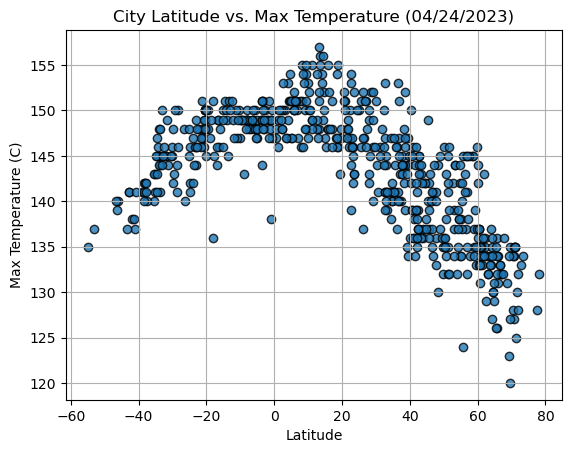

In [369]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/24/2023)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

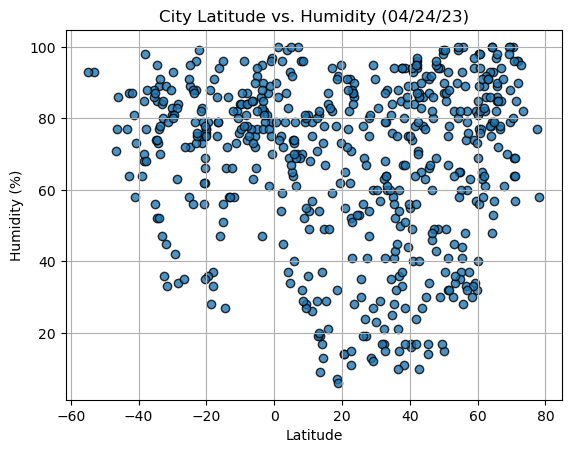

In [370]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

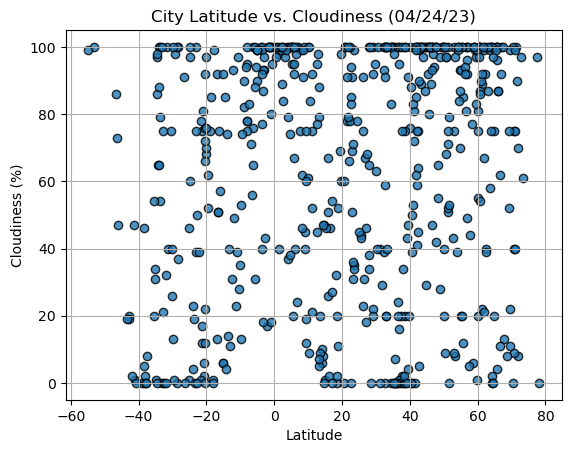

In [371]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

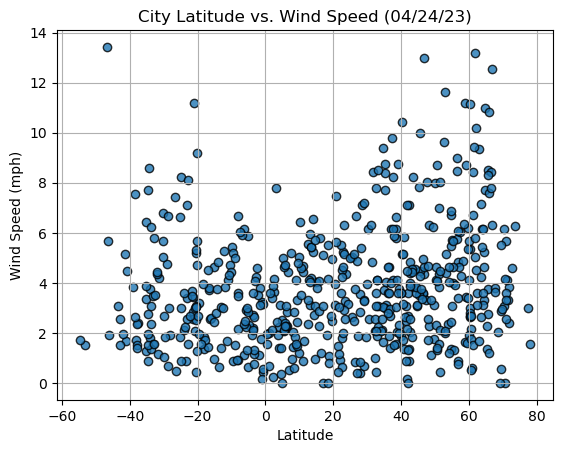

In [372]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [373]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    """Create and display a linear regression plot."""
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot with linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add line equation and r-squared value to plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r-squared = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-20), fontsize=15, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Display plot
    plt.show()


In [374]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kutum,14.2000,24.6667,153.0,17,6,5.25,SD,1682333580
3,qaanaaq,77.4840,-69.3632,128.0,77,97,2.98,GL,1682334079
7,ardakan,32.3100,54.0175,150.0,17,93,1.00,IR,1682334080
8,albany,42.6001,-73.9662,137.0,87,99,2.04,US,1682334080
10,pemangkat,1.1667,108.9667,149.0,86,98,2.00,ID,1682334081


In [391]:
# Convert Temp to Celsius
northern_hemi_df['Max Temp'] = ((northern_hemi_df['Max Temp'] - 32) * 5/9)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_16524\249694060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['Max Temp'] = ((northern_hemi_df['Max Temp'] - 32) * 5/9)


In [392]:

northern_hemi_df['Max Temp'] = northern_hemi_df['Max Temp'].round()
northern_hemi_df.head()

C:\Users\Roberto\AppData\Local\Temp\ipykernel_16524\1301082170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['Max Temp'] = northern_hemi_df['Max Temp'].round()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kutum,14.2000,24.6667,19.0,17,6,5.25,SD,1682333580
3,qaanaaq,77.4840,-69.3632,12.0,77,97,2.98,GL,1682334079
7,ardakan,32.3100,54.0175,19.0,17,93,1.00,IR,1682334080
8,albany,42.6001,-73.9662,14.0,87,99,2.04,US,1682334080
10,pemangkat,1.1667,108.9667,18.0,86,98,2.00,ID,1682334081


In [377]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,148.0,77,68,9.19,NC,1682334078
1,bengkulu,-3.8004,102.2655,149.0,86,100,1.93,ID,1682333924
4,bredasdorp,-34.5322,20.0403,147.0,52,86,7.70,ZA,1682334079
5,cape town,-33.9258,18.4232,145.0,89,88,3.74,ZA,1682334013
6,rikitea,-23.1203,-134.9692,149.0,88,100,7.13,PF,1682334080


In [388]:
# Convert Temp to Celsius
southern_hemi_df['Max Temp'] = ((southern_hemi_df['Max Temp'] - 32) * 5/9)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_16524\1719854802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['Max Temp'] = ((southern_hemi_df['Max Temp'] - 32) * 5/9)


In [389]:

southern_hemi_df['Max Temp'] = southern_hemi_df['Max Temp'].round()
southern_hemi_df.head()

C:\Users\Roberto\AppData\Local\Temp\ipykernel_16524\3977519536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['Max Temp'] = southern_hemi_df['Max Temp'].round()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,18.0,77,68,9.19,NC,1682334078
1,bengkulu,-3.8004,102.2655,18.0,86,100,1.93,ID,1682333924
4,bredasdorp,-34.5322,20.0403,18.0,52,86,7.70,ZA,1682334079
5,cape town,-33.9258,18.4232,17.0,89,88,3.74,ZA,1682334013
6,rikitea,-23.1203,-134.9692,18.0,88,100,7.13,PF,1682334080


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.828264442836081


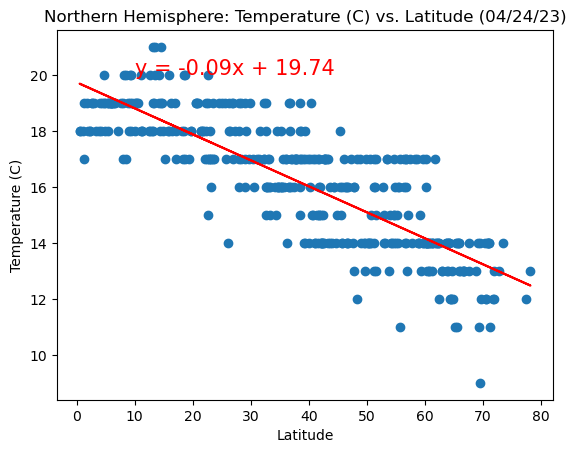

In [393]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere: Temperature (C) vs. Latitude (%s)" % time.strftime("%x"))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on.png')
plt.show()


The r-value is: 0.6597732184212227


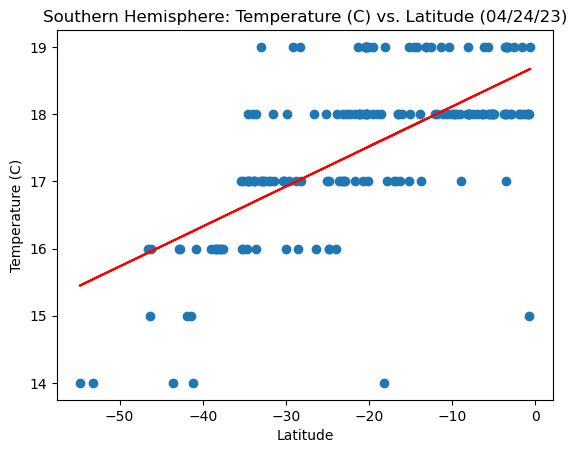

In [394]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude (%s)" % time.strftime("%x"))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Temp on.png')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

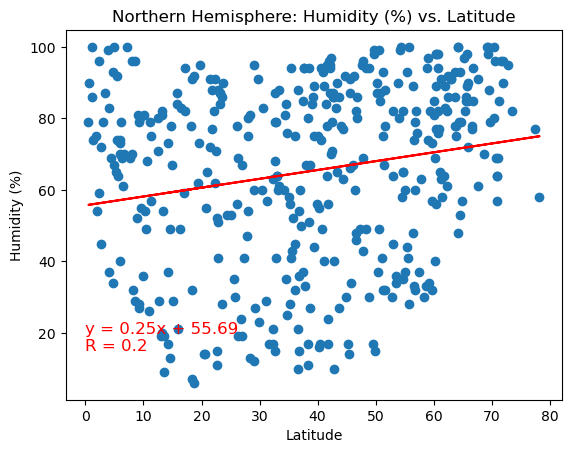

In [395]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Humidity (%) on.png')
plt.show()

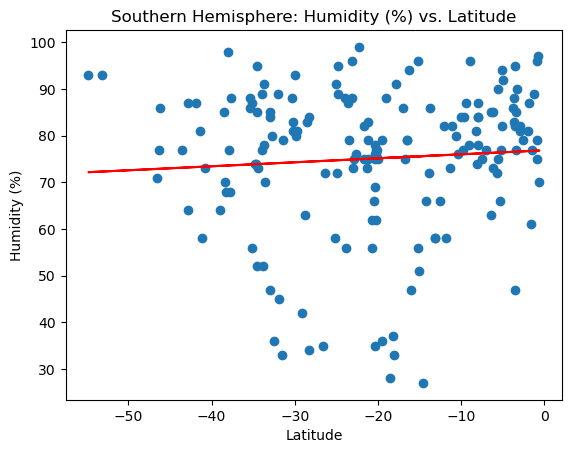

In [396]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Humidity (%) on.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

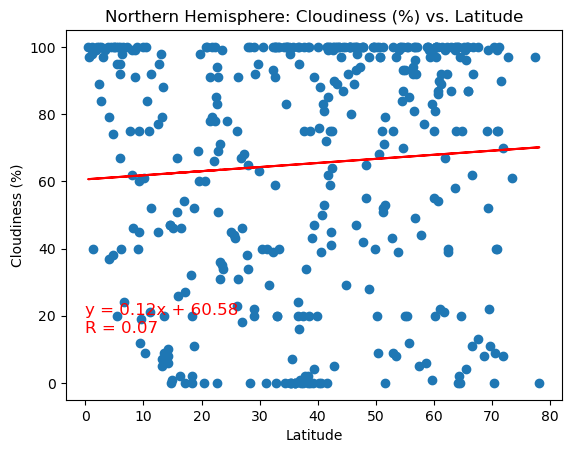

In [384]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Cloudiness (%).png')
plt.show()

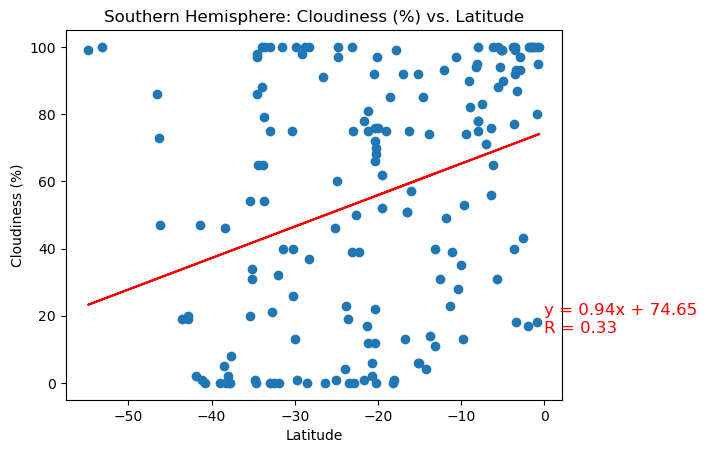

In [385]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Cloudiness (%).png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

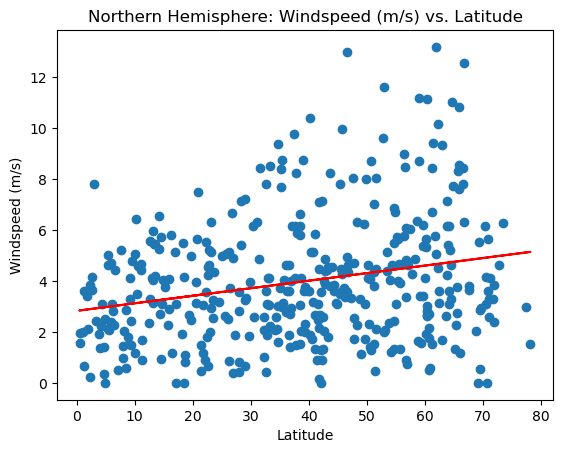

In [386]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.title("Northern Hemisphere: Windspeed (m/s) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Windspeed (m/s).png')
plt.show()

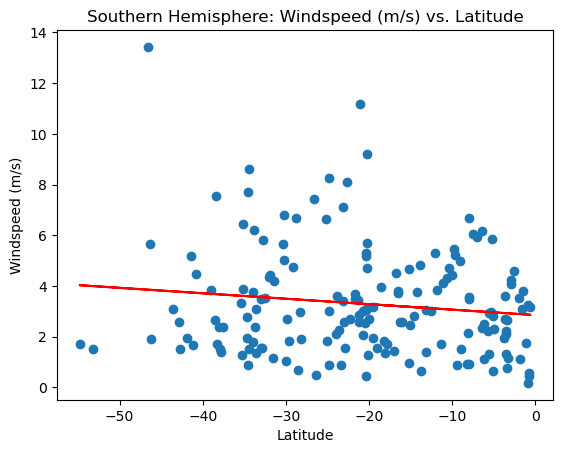

In [387]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.title("Southern Hemisphere: Windspeed (m/s) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Windspeed (m/s).png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE